# Pillar 5

This pillar is a retail sentiment (miscellaneous) pillar using google trends, and job vacancies

In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('/Users/acannon/Dropbox')
import seaborn as sns
sns.set_theme()
sns.set_palette('colorblind')
import warnings
warnings.filterwarnings('ignore')

In [14]:
gt = pd.read_excel('diss_data/Google Trends Data.xlsx')

gt = gt.drop(['t'], axis = 1)
gt.head()

,Month,Benefits,Indeed,Linkedin,SkyScanner,Emirates,Holiday,Film,DIY,Gifts,...,Merc,Toyota,Resort,RyanAir,Museums,McD,Gucci,LV,Zara,fm
0,2004-01,76.00,0.00,0.50,1.00,48.00,79.00,71.00,80.00,18,...,58,98,87,79,93,12,20,23,6,0.00
1,2004-02,62.00,0.50,0.00,1.00,39.00,64.00,75.00,77.00,22,...,49,90,73,69,100,12,21,23,7,0.00
2,2004-03,66.00,0.50,0.50,1.00,42.00,57.00,66.00,77.00,18,...,50,94,60,67,93,12,21,26,9,0.00
3,2004-04,45.00,0.50,0.50,1.00,39.00,67.00,65.00,95.00,18,...,64,93,62,76,93,12,23,25,9,8.00
4,2004-05,70.00,0.50,0.50,1.00,41.00,76.00,64.00,87.00,19,...,53,93,68,66,82,11,23,27,9,3.00


In [12]:
rotations = [-0.2751, 0.3088, 0.2419, 0.2419, -0.0303, -0.2056, 0.0179, -0.1335, 0.2195, 0.0238, -0.0034, 0.1473, -0.0730, -0.0987, -0.2715, -0.1405, 0.2998, 0.2868 ,0.3217 ,0.3189, 0.3006]
# need to multiply each column by these rotations.
var = ["Benefits","Indeed", "Linkedin", "SkyScanner" ,"Emirates" ,"Holiday" ,"Film" ,"DIY", "Gifts" ,"Clothes" ,"Jobs" ,"Merc" ,"Toyota" ,"Resort" ,"RyanAir" ,"Museums" ,"McD", "Gucci", "LV", "Zara", "fm"]


In [18]:
# creating a dataframe for differences
differences = pd.DataFrame()

for v in var:
    differences[v] = gt[v].diff() 

differences.to_excel('diss_data/gt_diff.xlsx')

d_rotations = [0.1417, 0.2640, 0.2119, 0.2852, 0.2340, 0.2362, -0.1103, 0.0195, -0.3094, -0.1433, 0.2992, 0.1512, 0.2555,  0.2879, 0.2679 , 0.1161, -0.0032, -0.2649, -0.2493, -0.2505, 0.0609]

diff_w = pd.DataFrame()

for i in range(0,len(var)):
    diff_w[var[i]] = differences[var[i]]*d_rotations[i]

diff_w['trends'] = diff_w.sum(axis = 1)
diff_w['Month'] = gt['Month']

<AxesSubplot:ylabel='trends'>

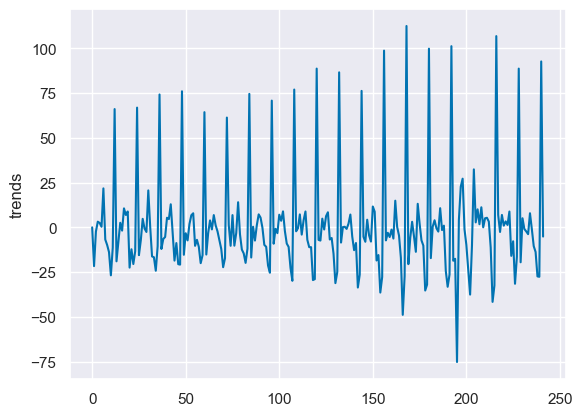

In [19]:
sns.lineplot(diff_w['trends'])

In [4]:
gt_w = pd.DataFrame()

for i in range(0,len(var)):
    gt_w[var[i]] = gt[var[i]]*rotations[i]

gt_w['trends'] = gt_w.sum(axis = 1)
gt_w['Month'] = gt['Month']

<AxesSubplot:ylabel='trends'>

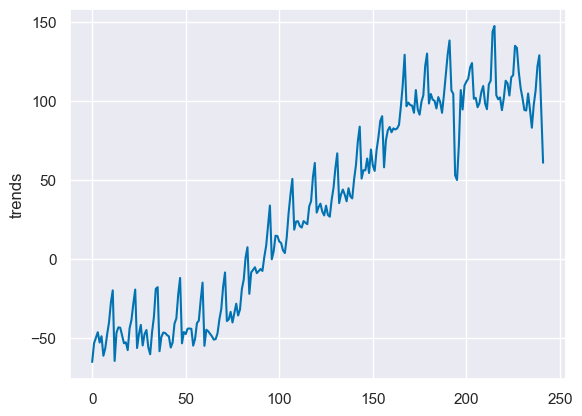

In [5]:
sns.lineplot(gt_w['trends'])

In [8]:

std = pd.read_excel('diss_data/std_gt.xlsx')
std_rot = [-0.0268,0.4361,0.2970,0.4448,0.1754,0.0226,-0.0843,-0.1768,-0.3240,0.0958,0.2119,0.1849,0.1853,0.2209,0.0963,0.1309,0.0688,-0.2044,-0.2247,-0.1791,0.1469]

In [9]:
std_new = std.filter(regex= "std")

In [10]:
std_new.head()

,std_resid_Benefits,std_resid_Indeed,std_resid_Linkedin,std_resid_SkyScanner,std_resid_Emirates,std_resid_Holiday,std_resid_Film,std_resid_DIY,std_resid_Gifts,std_resid_Clothes,...,std_resid_Merc,std_resid_Toyota,std_resid_Resort,std_resid_RyanAir,std_resid_Museums,std_resid_McD,std_resid_Gucci,std_resid_LV,std_resid_Zara,std_resid_fm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.20,0.10,-0.83,0.74,0.13,-0.07,0.80,-0.58,-0.41,1.77,...,-1.92,-1.89,0.01,-1.00,-0.58,-0.13,0.37,0.56,0.76,-0.45
2,0.23,0.16,0.35,0.36,0.86,-1.31,-0.91,-0.61,0.12,-1.70,...,0.40,1.51,-1.44,-0.45,0.52,-0.56,0.36,1.22,-0.00,0.28
3,-2.05,0.44,0.47,0.33,0.29,0.74,-0.41,1.76,0.80,-0.24,...,2.78,0.38,0.18,1.16,-0.56,-0.91,0.29,-0.45,-0.25,0.88
4,2.93,-0.09,-0.18,-0.32,0.56,1.18,0.36,-0.57,-0.18,0.90,...,-1.90,0.59,0.74,-1.84,-0.80,1.04,-0.16,0.19,-0.43,-0.73


In [15]:
for col in std_new.columns:
    if col.startswith('std_resid_'):
        new_col_name = col.split('_')[2]  # Extract the variable name
        std_new.rename(columns={col: new_col_name}, inplace=True)

std_new.head()

,Benefits,Indeed,Linkedin,SkyScanner,Emirates,Holiday,Film,DIY,Gifts,Clothes,...,Merc,Toyota,Resort,RyanAir,Museums,McD,Gucci,LV,Zara,fm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.20,0.10,-0.83,0.74,0.13,-0.07,0.80,-0.58,-0.41,1.77,...,-1.92,-1.89,0.01,-1.00,-0.58,-0.13,0.37,0.56,0.76,-0.45
2,0.23,0.16,0.35,0.36,0.86,-1.31,-0.91,-0.61,0.12,-1.70,...,0.40,1.51,-1.44,-0.45,0.52,-0.56,0.36,1.22,-0.00,0.28
3,-2.05,0.44,0.47,0.33,0.29,0.74,-0.41,1.76,0.80,-0.24,...,2.78,0.38,0.18,1.16,-0.56,-0.91,0.29,-0.45,-0.25,0.88
4,2.93,-0.09,-0.18,-0.32,0.56,1.18,0.36,-0.57,-0.18,0.90,...,-1.90,0.59,0.74,-1.84,-0.80,1.04,-0.16,0.19,-0.43,-0.73


In [16]:
std_w = pd.DataFrame()
for i in range(0,len(var)):
    std_w[var[i]] = std_new[var[i]]*std_rot[i]

<AxesSubplot:ylabel='trends'>

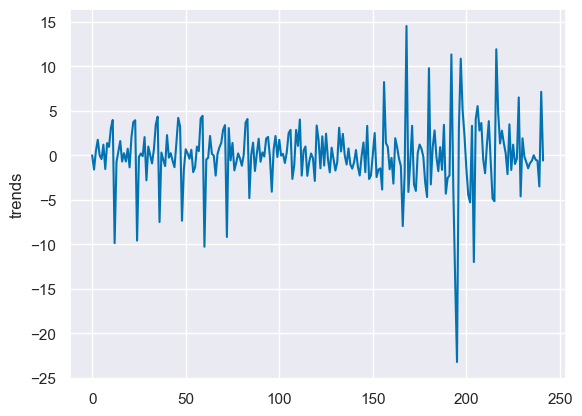

In [19]:
std_w['trends'] = std_w.sum(axis = 1)
sns.lineplot(std_w['trends'])